## Q1. In order to predict house price based on several characteristics, such as location, square footage, number of bedrooms, etc., you are developing an SVM regression model. Which regression metric in this situation would be the best to employ?

In the context of developing an SVM regression model to predict house prices based on various characteristics, Mean Squared Error (MSE) would be a suitable regression metric.

MSE measures the average squared difference between the predicted and actual values. In the case of house price prediction, you want your model to minimize the errors in predicting the actual prices. MSE is a widely used and intuitive metric for regression problems, and it directly penalizes larger errors, giving you a sense of how well your model is performing in terms of predicting numerical values.

Therefore, when assessing the performance of your SVM regression model for house price prediction, you can use MSE as the primary evaluation metric. The goal is to achieve the lowest MSE, indicating that the predicted house prices are as close as possible to the actual prices.

## Q2. You have built an SVM regression model and are trying to decide between using MSE or R-squared as your evaluation metric. Which metric would be more appropriate if your goal is to predict the actual price of a house as accurately as possible?

For predicting the actual price of a house with an SVM regression model, Mean Squared Error (MSE) would be a more appropriate evaluation metric. 

MSE measures the average squared difference between the predicted and actual values. In the context of house price prediction, you want to minimize the errors in your predictions, and MSE directly penalizes larger errors more heavily. Lower MSE values indicate better performance, meaning that the predicted prices are closer to the actual prices.

On the other hand, R-squared (coefficient of determination) is a measure of the proportion of the variance in the dependent variable that is predictable from the independent variable(s). While R-squared can provide insights into the goodness of fit, it may not be as directly interpretable for the goal of predicting house prices accurately.

In summary, if your primary goal is to predict house prices as accurately as possible, focus on minimizing Mean Squared Error (MSE) when evaluating your SVM regression model.

## Q3. You have a dataset with a significant number of outliers and are trying to select an appropriate regression metric to use with your SVM model. Which metric would be the most appropriate in this scenario?

When dealing with a dataset that has a significant number of outliers, Mean Absolute Error (MAE) can be a more robust regression metric compared to Mean Squared Error (MSE). 

MAE calculates the average absolute difference between the predicted and actual values. Unlike MSE, which squares the errors, MAE gives equal weight to all errors, making it less sensitive to extreme values or outliers. Therefore, MAE is more robust in the presence of outliers because it doesn't amplify their impact as much as MSE does.

In the context of an SVM regression model, if you are concerned about the influence of outliers and want a metric that provides a more balanced view of the prediction errors, MAE would be a suitable choice. By using MAE, you give more importance to the magnitude of errors rather than their squared values, making your evaluation metric less sensitive to extreme observations in the dataset.

## Q4. You have built an SVM regression model using a polynomial kernel and are trying to select the best metric to evaluate its performance. You have calculated both MSE and RMSE and found that both values are very close. Which metric should you choose to use in this case?

When you have calculated both Mean Squared Error (MSE) and Root Mean Squared Error (RMSE) for evaluating your SVM regression model with a polynomial kernel, and both values are very close, it is generally recommended to choose the metric that aligns better with the specific goals and interpretability of your problem.

Both MSE and RMSE measure the average squared difference between predicted and actual values, with RMSE providing a more interpretable scale as it is in the same units as the target variable. The decision between MSE and RMSE often comes down to personal preference or specific requirements of the problem.

If you want an error metric that is directly interpretable in the same units as your target variable, you might choose RMSE. On the other hand, if you prefer a metric that gives equal weight to all errors and is easier to compute and work with, you might choose MSE.

In summary, when MSE and RMSE are very close, the choice between them may depend on factors like ease of interpretation or specific preferences related to the problem at hand.

## Q5. You are comparing the performance of different SVM regression models using different kernels (linear, polynomial, and RBF) and are trying to select the best evaluation metric. Which metric would be most appropriate if your goal is to measure how well the model explains the variance in the target variable?

When your goal is to measure how well the model explains the variance in the target variable, R-squared (coefficient of determination) would be the most appropriate evaluation metric.

R-squared is a metric that quantifies the proportion of the variance in the dependent variable that is explained by the independent variables in the model. It ranges from 0 to 1, where 0 indicates that the model does not explain any variance, and 1 indicates perfect explanation of variance. Higher R-squared values suggest that a larger proportion of the variance in the target variable is captured by the model.

In the context of comparing different SVM regression models with different kernels (linear, polynomial, and RBF), R-squared can provide insights into how well each model is performing in terms of explaining the variability in the target variable. It is particularly useful when assessing the goodness of fit and the explanatory power of the models.

Therefore, for your specific goal of measuring how well the models explain the variance, R-squared would be the metric of choice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Bengaluru_House_Data.csv')

In [3]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [6]:
df.shape

(13320, 9)

In [7]:
for columns in df.columns:
  print(df[columns].value_counts())
  print("*"*20)


area_type
Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: count, dtype: int64
********************
availability
Ready To Move    10581
18-Dec             307
18-May             295
18-Apr             271
18-Aug             200
                 ...  
15-Aug               1
17-Jan               1
16-Nov               1
16-Jan               1
14-Jul               1
Name: count, Length: 81, dtype: int64
********************
location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
********************
size
2 BHK    

In [8]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [9]:
df.drop(columns=['area_type','availability','society','balcony'],inplace=True)

In [10]:
df.describe()

,bath,price
count,13247.000000,13320.000000
mean,2.692610,112.565627
std,1.341458,148.971674
min,1.000000,8.000000
25%,2.000000,50.000000
50%,2.000000,72.000000
75%,3.000000,120.000000
max,40.000000,3600.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   size        13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [12]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64

In [13]:
df['location']=df['location'].fillna('Sarjapur Road')

In [14]:
df['size']=df['size'].fillna('2 BHK')

In [15]:
df['bath']=df['bath'].fillna(df['bath'].median())


In [16]:
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [17]:
df[df.bhk>20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [18]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [19]:
def converrange(x):
  temp=x.split('-')
  if len(temp)==2:
    return (float(temp[0])+float(temp[1]))/2
  try:
    return float(x)
  except:
    return None

In [20]:
df['total_sqft']=df['total_sqft'].apply(converrange)

In [21]:
df['price_per_fit']=df['price']*100000/df['total_sqft']

In [22]:
df['price_per_fit']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_fit, Length: 13320, dtype: float64

In [23]:
df.describe()

,total_sqft,bath,price,bhk,price_per_fit
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [24]:
df['location'].value_counts()

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Uvce Layout                         1
Abshot Layout                       1
Name: count, Length: 1306, dtype: int64

In [25]:
df['location']=df['location'].apply(lambda x:x.strip())
location_count=df['location'].value_counts()

In [26]:
location_count_less_10=location_count[location_count<=10]
location_count_less_10

location
BTM 1st Stage                         10
Nagadevanahalli                       10
Basapura                              10
Sector 1 HSR Layout                   10
Dairy Circle                          10
                                      ..
1Channasandra                          1
Hosahalli                              1
Vijayabank bank layout                 1
near Ramanashree California resort     1
Abshot Layout                          1
Name: count, Length: 1054, dtype: int64

In [27]:
df['location']=df['location'].apply(lambda x:'other' if x in location_count_less_10 else x)

In [28]:
df.describe()

,total_sqft,bath,price,bhk,price_per_fit
count,13274.000000,13320.000000,13320.000000,13320.000000,1.327400e+04
mean,1559.626694,2.688814,112.565627,2.802778,7.907501e+03
std,1238.405258,1.338754,148.971674,1.294496,1.064296e+05
min,1.000000,1.000000,8.000000,1.000000,2.678298e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.266865e+03
50%,1276.000000,2.000000,72.000000,3.000000,5.434306e+03
75%,1680.000000,3.000000,120.000000,3.000000,7.311746e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [29]:
df=df[((df['total_sqft']/df['bhk'])>=300)]
df.describe()

,total_sqft,bath,price,bhk,price_per_fit
count,12530.000000,12530.000000,12530.000000,12530.000000,12530.000000
mean,1594.564544,2.559537,111.382401,2.650838,6303.979357
std,1261.271296,1.077938,152.077329,0.976678,4162.237981
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [30]:
df.shape

(12530, 7)

In [31]:
def remove_outliers_sqft(df):
  df_output=pd.DataFrame()
  for key ,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_fit)
    st=np.std(subdf.price_per_fit)
    gen_df=subdf[(subdf.price_per_fit>(m-st)) & (subdf.price_per_fit<=(m+st))]
    df_output=pd.concat([df_output,gen_df],ignore_index=True)
  return df_output
dff=remove_outliers_sqft(df)
dff.describe()



,total_sqft,bath,price,bhk,price_per_fit
count,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,1508.440608,2.471702,91.286372,2.574896,5659.062876
std,880.694214,0.979449,86.342786,0.897649,2265.774749
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4244.897959
50%,1286.000000,2.000000,67.000000,2.000000,5175.600739
75%,1650.000000,3.000000,100.000000,3.000000,6428.571429
max,30400.000000,16.000000,2200.000000,16.000000,24509.803922


In [32]:
def bhk_outlier_remover(df):
  exclude_data=np.array([])
  for location ,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          "mean":np.mean(bhk_df.price_per_fit),
          "std":np.std(bhk_df.price_per_fit),
          "count":bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_data=np.append(exclude_data,bhk_df[bhk_df.price_per_fit<(stats['mean'])].index.values)
  return dff.drop(exclude_data,axis='index')




In [33]:
dff=bhk_outlier_remover(dff)

In [34]:
dff.shape

(7361, 7)

In [35]:
dff

,location,size,total_sqft,bath,price,bhk,price_per_fit
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
...,...,...,...,...,...,...,...
10292,other,2 BHK,1200.0,2.0,70.0,2,5833.333333
10293,other,1 BHK,1800.0,1.0,200.0,1,11111.111111
10296,other,2 BHK,1353.0,2.0,110.0,2,8130.081301
10297,other,1 Bedroom,812.0,1.0,26.0,1,3201.970443


In [36]:
dff.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [37]:
dff[dff.bath>10]

,location,size,total_sqft,bath,price,bhk,price_per_fit
5313,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8543,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8632,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9365,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9697,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'count')

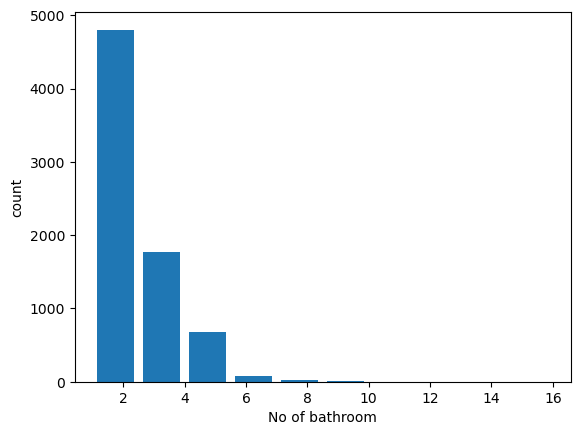

In [38]:
plt.hist(dff.bath,rwidth=0.8)
plt.xlabel("No of bathroom")
plt.ylabel("count")

In [39]:
dff[(dff.bath>dff.bhk+2)]

,location,size,total_sqft,bath,price,bhk,price_per_fit
1637,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5274,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6759,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8468,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [40]:
dff=dff[~(dff.bath>dff.bhk+2)]

In [41]:
dff.shape

(7357, 7)

In [42]:
dff.head()

,location,size,total_sqft,bath,price,bhk,price_per_fit
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668


In [43]:
dff=dff.drop(['size','price_per_fit'],axis=1)

In [44]:
dff.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [45]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7357 entries, 0 to 10300
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    7357 non-null   object 
 1   total_sqft  7357 non-null   float64
 2   bath        7357 non-null   float64
 3   price       7357 non-null   float64
 4   bhk         7357 non-null   int32  
dtypes: float64(3), int32(1), object(1)
memory usage: 316.1+ KB


In [46]:
dummies=pd.get_dummies(dff.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [47]:
df_new=pd.concat([dff,dummies.drop('other',axis=1)],axis=1)

In [48]:
df_new.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1st Block Jayanagar,1630.0,3.0,194.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1st Block Jayanagar,1875.0,2.0,235.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1st Block Jayanagar,1200.0,2.0,130.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1st Block Jayanagar,1235.0,2.0,148.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [49]:
df_new.drop('location',axis=1,inplace=True)

In [50]:
df_new.shape

(7357, 245)

In [51]:
df_new.to_csv('Cleaned_preprocessed_data.csv')

In [52]:
x=df_new.drop(columns=["price"])
y=df_new['price']

In [53]:
x,y

(       total_sqft  bath  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
 0          2850.0   4.0    4                 True               False   
 1          1630.0   3.0    3                 True               False   
 2          1875.0   2.0    3                 True               False   
 3          1200.0   2.0    3                 True               False   
 4          1235.0   2.0    2                 True               False   
 ...           ...   ...  ...                  ...                 ...   
 10292      1200.0   2.0    2                False               False   
 10293      1800.0   1.0    1                False               False   
 10296      1353.0   2.0    2                False               False   
 10297       812.0   1.0    1                False               False   
 10300      3600.0   5.0    4                False               False   
 
        2nd Phase Judicial Layout  2nd Stage Nagarbhavi  5th Block Hbr Layout  \
 0                          F

In [54]:
from sklearn.model_selection import train_test_split

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
scaler=StandardScaler()

In [67]:
scaler.fit(x_train)

StandardScaler()

In [72]:
x_train_scaled=pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)

In [73]:
x_test_scaled=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [74]:
from sklearn.svm import SVR


In [75]:
svr=SVR(kernel='linear')

In [76]:
svr.fit(x_train_scaled,y_train)

SVR(kernel='linear')

In [77]:
y_pred=svr.predict(x_test_scaled)

In [78]:
from sklearn.metrics import r2_score

In [79]:
print(r2_score(y_pred,y_test))

0.7796098806359241


In [84]:
from sklearn.model_selection import RandomizedSearchCV

In [85]:
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
            
              'epsilon':[0.1,0.2,0.3]
              }

In [90]:
regressor=RandomizedSearchCV(SVR(),param_distributions=param_grid,cv=5)

In [91]:
regressor.fit(x_train_scaled,y_train)

RandomizedSearchCV(cv=5, estimator=SVR(),
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'epsilon': [0.1, 0.2, 0.3],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]})

In [92]:
regressor.best_params_

{'gamma': 0.001, 'epsilon': 0.3, 'C': 1000}

In [93]:
y_pred=regressor.predict(x_test_scaled)

In [94]:
print(r2_score(y_pred,y_test))

0.764367297358252


In [95]:
svr=SVR(kernel='linear',gamma=0.001,epsilon=0.3,C=1000)

In [96]:
svr.fit(x_train_scaled,y_train)

SVR(C=1000, epsilon=0.3, gamma=0.001, kernel='linear')

In [97]:
y_pred=svr.predict(x_test_scaled)

In [98]:
print(r2_score(y_pred,y_test))

0.7892538243266976


In [99]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_pred,y_test))

1323.7360344752678
